### Kinematic analysis

Verify whether this structure is unstable:

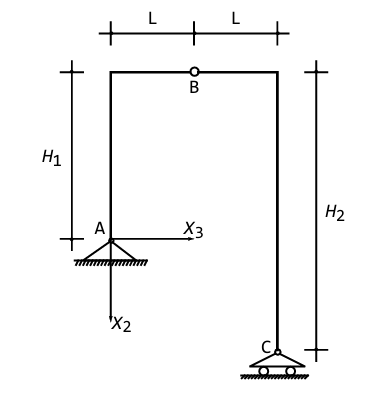

In [1]:
# Importing SymPy
import sympy as smp

In [2]:
# Variables
x, y, vx_left, vy_left, vx_right, vy_right, phi_left, phi_right = smp.symbols("x y v_x_l v_y_l v_x_r v_y_r phi_l phi_r", real = True) # Lagrangian variables
H1, H2, L = smp.symbols("H_1 H_2 L", real = True, positive = True, constant = True) # Constants

# Position of a generic point
r = smp.Matrix([x, y])

# Traslation vectors (infinitesimal)
v_left = smp.Matrix([vx_left, vy_left])
v_right = smp.Matrix([vx_right, vy_right])

# Rotation matrices (infinitesimal)
R_left = smp.Matrix([[1, - phi_left],
                     [phi_left, 1]])

R_right = smp.Matrix([[1, - phi_right],
                      [phi_right, 1]])

In [3]:
# Displacement vectors for a generic point
u_left = R_left * (r + v_left) - r
u_right = R_right * (r + v_right) - r

In [4]:
# Coordinates of the points A, B, C
A = {
    x: 0,
    y: 0
}

B = {
    x: L,
    y: - H1
}

C = {
    x: 2 * L,
    y: H2 - H1
}

In [5]:
# Constraint equations 
m1 = smp.Eq(u_left[0].subs(A), 0) # u_x_left is zero in A

m2 = smp.Eq(u_left[1].subs(A), 0) # u_y_left is zero in A

m3 = smp.Eq(u_right[1].subs(C), 0) # u_y_right is zero in C

m4 = smp.Eq(u_left[0].subs(B), u_right[0].subs(B)) # u_x_left = u_x_right in B

m5 = smp.Eq(u_left[1].subs(B), u_right[1].subs(B)) # u_y_left = u_y_right in B

In [6]:
m1

Eq(-phi_l*v_y_l + v_x_l, 0)

In [7]:
m2

Eq(phi_l*v_x_l + v_y_l, 0)

In [8]:
m3

Eq(phi_r*(2*L + v_x_r) + v_y_r, 0)

In [9]:
m4

Eq(-phi_l*(-H_1 + v_y_l) + v_x_l, -phi_r*(-H_1 + v_y_r) + v_x_r)

In [10]:
m5

Eq(phi_l*(L + v_x_l) + v_y_l, phi_r*(L + v_x_r) + v_y_r)

In [11]:
equations = [m1, m2, m3, m4, m5]
variables = [vx_left, vy_left, vy_right, phi_left, phi_right] # Chosen vx_right as the free variable

# The solution is not (0, 0, 0, 0, 0, 0): the structure is unstable!
solution = smp.solve(equations, variables, dict = True)
sol1, sol2 = solution

In [12]:
sol1

{phi_l: (H_1 - sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2))/(2*L + v_x_r),
 phi_r: -H_1/(2*L + v_x_r) + sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2)/(2*L + v_x_r),
 v_x_l: 0,
 v_y_l: 0,
 v_y_r: H_1 - sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2)}

In [13]:
sol2

{phi_l: (H_1 + sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2))/(2*L + v_x_r),
 phi_r: -H_1/(2*L + v_x_r) - sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2)/(2*L + v_x_r),
 v_x_l: 0,
 v_y_l: 0,
 v_y_r: H_1 + sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2)}

In [14]:
# The point A doesn't move
u_left.subs(sol1).subs(A)

Matrix([
[0],
[0]])

In [15]:
# Displacement of the point B, case 1
u_B1 = u_right.subs(sol1).subs(B).applyfunc(smp.factor)
u_B1

Matrix([
[H_1*(H_1 - sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2))/(2*L + v_x_r)],
[  L*(H_1 - sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2))/(2*L + v_x_r)]])

In [16]:
# Displacement of the point B, case 2
u_B2 = u_right.subs(sol2).subs(B).applyfunc(smp.factor)
u_B2

Matrix([
[H_1*(H_1 + sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2))/(2*L + v_x_r)],
[  L*(H_1 + sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2))/(2*L + v_x_r)]])

In [17]:
# Displacement of the point C, case 1
u_C1 = u_right.subs(sol1).subs(C).applyfunc(smp.factor)
u_C1

Matrix([
[(H_1 + H_2)*(H_1 - sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2))/(2*L + v_x_r)],
[                                                                    0]])

In [18]:
# Displacement of the point C, case 2
u_C2 = u_right.subs(sol2).subs(C).applyfunc(smp.factor)
u_C2

Matrix([
[(H_1 + H_2)*(H_1 + sqrt(H_1**2 - 2*L*v_x_r - v_x_r**2))/(2*L + v_x_r)],
[                                                                    0]])

In [19]:
# Taylor series approximations
u_B1[0] = smp.series(expr = u_B1[0],
                     x = vx_right,
                     x0 = 0,
                     n = 2).removeO()

u_B1[1] = smp.series(expr = u_B1[1],
                     x = vx_right,
                     x0 = 0,
                     n = 2).removeO()

u_C1[0] = smp.series(expr = u_C1[0],
                     x = vx_right,
                     x0 = 0,
                     n = 2).removeO()

u_B2[0] = smp.series(expr = u_B2[0],
                     x = vx_right,
                     x0 = 0,
                     n = 2).removeO()

u_B2[1] = smp.series(expr = u_B2[1],
                     x = vx_right,
                     x0 = 0,
                     n = 2).removeO()

u_C2[0] = smp.series(expr = u_C2[0],
                     x = vx_right,
                     x0 = 0,
                     n = 2).removeO()

In [20]:
# Displacement of the point B, case 1
u_B1

Matrix([
[        v_x_r/2],
[L*v_x_r/(2*H_1)]])

In [21]:
# Displacement of the point B, case 2
u_B2

Matrix([
[H_1**2/L + v_x_r*(-H_1**2/(2*L**2) - 1/2)],
[     H_1 + v_x_r*(-H_1/(2*L) - L/(2*H_1))]])

In [22]:
# Displacement of the point C, case 1
u_C1

Matrix([
[v_x_r*(1/2 + H_2/(2*H_1))],
[                        0]])

In [23]:
# Displacement of the point C, case 2
u_C2

Matrix([
[H_1**2/L + H_1*H_2/L + v_x_r*(-H_1**2/(2*L**2) - H_1*H_2/(2*L**2) - 1/2 - H_2/(2*H_1))],
[                                                                                     0]])

In [24]:
# Perturbation analysis
delta = smp.symbols("delta", real = True, positive = True, constant = True)

equations.append(smp.Eq(u_right[0].subs(C), delta)) # u_x_right is delta in C
variables.append(vx_right) # Appending vx_right in the variables list

# Solution
solution = smp.solve(equations, variables, dict = True)[0]
solution

{phi_l: delta/(H_1 + H_2),
 phi_r: -delta/(H_1 + H_2),
 v_x_l: 0,
 v_x_r: 2*delta*(H_1**2 + H_1*H_2 - L*delta)/(H_1**2 + 2*H_1*H_2 + H_2**2 + delta**2),
 v_y_l: 0,
 v_y_r: 2*delta*(H_1*L + H_1*delta + H_2*L)/(H_1**2 + 2*H_1*H_2 + H_2**2 + delta**2)}

In [25]:
# A doesn't move still
u_left.subs(solution).subs(A)

Matrix([
[0],
[0]])

In [26]:
# B displacement
u_left.subs(solution).subs(B)

Matrix([
[H_1*delta/(H_1 + H_2)],
[  L*delta/(H_1 + H_2)]])

In [27]:
# C displacement
u_right.subs(solution).subs(C).applyfunc(smp.simplify)

Matrix([
[delta],
[    0]])

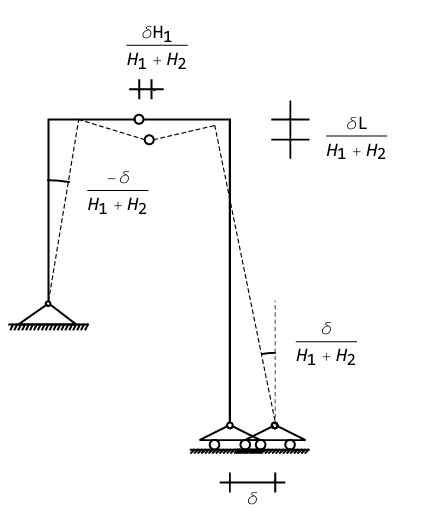